<a href="https://colab.research.google.com/github/Diyabaghla/Alarm_clock_using_python/blob/main/Cat_Vs_Dog_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:41<00:00, 31.2MB/s]
100% 1.06G/1.06G [00:41<00:00, 27.8MB/s]


In [3]:
import zipfile
zip_ref=zipfile.ZipFile("/content/dogs-vs-cats.zip")
zip_ref.extractall('/content')
zip_ref.close()

In [18]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [5]:
#generators
train_data=keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

validation_data=keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)




Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [6]:
#images k array ka index 0 to 255 h and we need to make it 0 to 1
#so we will normalize it
def process(image,label):
  image=tf.cast(image/255. ,tf.float32)
  return image,label

train_data=train_data.map(process)
validation_data=validation_data.map(process)#all pixel value should be in 0 to 1 otherwise result will not be accurate

In [19]:
#create cnn model

model=Sequential()


model.add(Conv2D(filters=32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(filters=64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(filters=128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [21]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [22]:
#now we are training the data
history=model.fit(train_data,epochs=10,validation_data=validation_data)

Epoch 1/10
625/625 [==============================] - 71s 108ms/step - loss: 1.0905 - accuracy: 0.5956 - val_loss: 0.6725 - val_accuracy: 0.6280
Epoch 2/10
625/625 [==============================] - 68s 108ms/step - loss: 0.6078 - accuracy: 0.6830 - val_loss: 0.5657 - val_accuracy: 0.7088
Epoch 3/10
625/625 [==============================] - 65s 103ms/step - loss: 0.5074 - accuracy: 0.7487 - val_loss: 0.5226 - val_accuracy: 0.7388
Epoch 4/10
625/625 [==============================] - 67s 108ms/step - loss: 0.4402 - accuracy: 0.7893 - val_loss: 0.4874 - val_accuracy: 0.7820
Epoch 5/10
625/625 [==============================] - 65s 103ms/step - loss: 0.4034 - accuracy: 0.8113 - val_loss: 0.4896 - val_accuracy: 0.7666
Epoch 6/10
625/625 [==============================] - 65s 103ms/step - loss: 0.3421 - accuracy: 0.8405 - val_loss: 0.5811 - val_accuracy: 0.7394
Epoch 7/10
625/625 [==============================] - 68s 108ms/step - loss: 0.2914 - accuracy: 0.8618 - val_loss: 0.4678 - val_ac

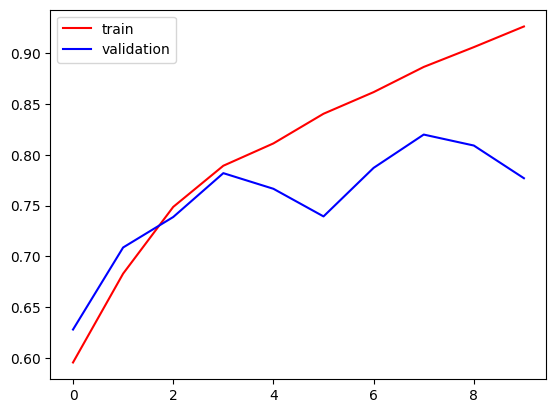

In [23]:
#now to check accuracy of the model we will visualise it using graphs......
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

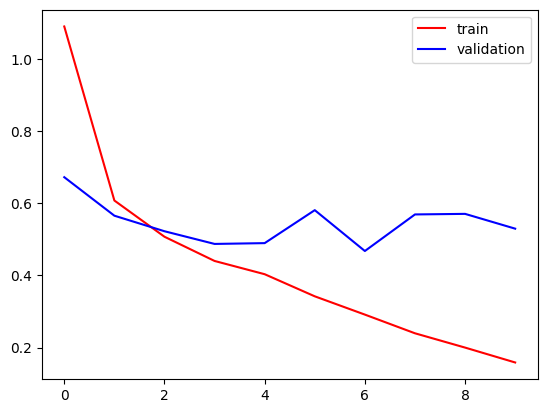

In [24]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

**the further cells tells the result of model before normalisation**

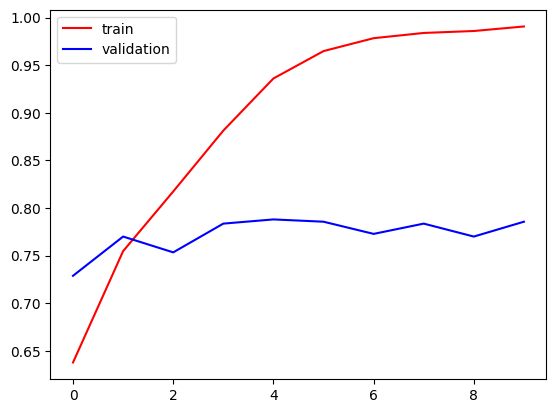

In [13]:
#now to check accuracy of the model we will visualise it using graphs..........before normalisation result was
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()#this gap shows that there is overfitting

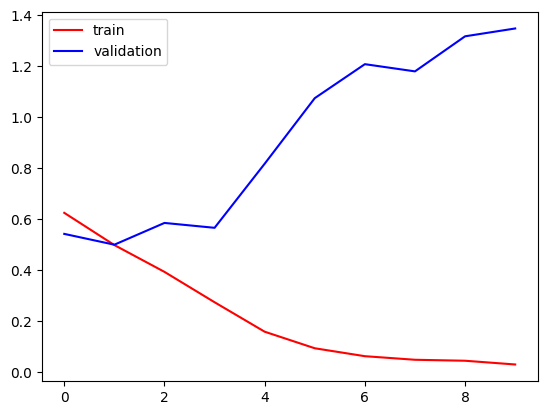

In [16]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

(-0.5, 611.5, 530.5, -0.5)

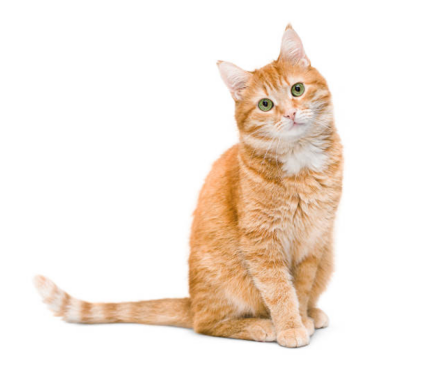

In [87]:
#now we will make predictions on new data
import cv2
test_img=cv2.imread('/content/cat1.jpg')
plt.imshow(test_img)
org_img=cv2.cvtColor(test_img,cv2.COLOR_BGR2RGB)
plt.imshow(org_img)
plt.axis('off')

In [88]:
test_img.shape

(531, 612, 3)

In [89]:
#as size is too big so we have to resize it first
test_img=cv2.resize(test_img,(256,256))

In [90]:
#as our data is in batches so we converted it(image) into 4 dimensional after resizing
test_input=test_img.reshape((1,256,256,3))

In [91]:
model.predict(test_input)

1/1 [==============================] - 0s 23ms/step


array([[1.]], dtype=float32)

In [17]:
#these graphs shows that training data is working good but not validation data

In [25]:
#ways to reduce overfitting

#add more data
#data augmentation
#l1/l2 Regularizer
#dropout
#batch norm
#reduce complexity